# Import Dataset & Libraries

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Import Dataset
file_path = '/content/drive/MyDrive/instagram_data.csv'
# Read the Excel file into a pandas DataFrame
df = pd.read_csv(file_path, encoding='utf-8')

In [11]:
df.head()

,Post Date,Likes,Comments,Hashtags,Engagement
0,2022-11-01,115,3,"skincare, naturalconfidence, beesline, n...",118
1,2022-11-04,269,13,"skincare, naturalconfidence, beesline, n...",282
2,2022-11-07,201,3,"skincare, naturalconfidence, beesline, n...",204
3,2022-11-09,328,3,"skincare, sale, offers, singlesday, na...",331
4,2022-11-10,226,12,"skincare, sale, offers, singlesday, na...",238


# Likes & Comments Over Time

In [12]:
# Convert 'Post Date' column to datetime format
df['Post Date'] = pd.to_datetime(df['Post Date'])

# Create an interactive line plot
fig = px.line(df, x='Post Date', y=['Likes', 'Comments'], title='Fluctuation of Likes and Comments Over Time')

# Display the plot
fig.show()

### Refining

> There are extreme values. Further investigation revealed that these posts with high engagment are not acttually Beesline post, but those associated with influencer sponsorships. For this reason, they must be removed.

In [13]:
# Convert 'Post Date' column to datetime format
df['Post Date'] = pd.to_datetime(df['Post Date'])

# Dates to be removed
dates_to_remove = ['2023-05-31', '2023-05-15', '2023-05-10', '2023-05-03', '2023-05-02', '2023-07-11', '2023-07-19', '2023-07-20', '2023-07-28']
df = df[~df['Post Date'].isin(pd.to_datetime(dates_to_remove))]

# Create an interactive line plot
fig = px.line(df, x='Post Date', y=['Likes', 'Comments'], title='Fluctuation of Likes and Comments Over Time')

# Display the plot
fig.show()

# Basic Exploration

In [14]:
# Convert 'Post Date' column to datetime format
df['Post Date'] = pd.to_datetime(df['Post Date'])

# Dates to be removed
dates_to_remove = ['2022-05-31', '2022-05-15', '2022-05-10', '2022-05-03', '2022-05-02']

# Create a new dataframe with rows except those with the dates_to_remove
filtered_df = df[~df['Post Date'].isin(pd.to_datetime(dates_to_remove))]

# Display the filtered dataframe
print(filtered_df)

     Post Date  Likes  Comments  \
0   2022-11-01    115         3   
1   2022-11-04    269        13   
2   2022-11-07    201         3   
3   2022-11-09    328         3   
4   2022-11-10    226        12   
..         ...    ...       ...   
135 2023-07-16    120         3   
136 2023-07-18     87         0   
139 2023-07-23     64         2   
140 2023-07-25    109         0   
143 2023-07-31    153         9   

                                              Hashtags  Engagement  
0    skincare,   naturalconfidence,   beesline,   n...         118  
1    skincare,   naturalconfidence,   beesline,   n...         282  
2    skincare,   naturalconfidence,   beesline,   n...         204  
3    skincare,   sale,   offers,   singlesday,   na...         331  
4    skincare,   sale,   offers,   singlesday,   na...         238  
..                                                 ...         ...  
135          instant_bright,   beesline,   PassTheGlow         123  
136                        

### Engagment & Hashtags

In [15]:
import pandas as pd
import plotly.graph_objs as go

# 1. Extract daily engagement:
daily_engagement = filtered_df.groupby('Post Date')['Engagement'].sum()

# 2. Identify special occasions and sale periods:
special_occasions = {
    'womensday': {'color': 'red', 'symbol': 'circle'},
    'womensmonth': {'color': 'red', 'symbol': 'circle'},
    'ramadankareem': {'color': 'black', 'symbol': 'star'},
    'ramadan': {'color': 'black', 'symbol': 'star'},
    'instantbright': {'color': 'blue', 'symbol': 'circle'},
    'instant_bright': {'color': 'blue', 'symbol': 'circle'},
    'passtheglow': {'color': 'blue', 'symbol': 'circle'},
    'sale': {'color': 'yellow', 'symbol': 'circle'},
    'offer': {'color': 'yellow', 'symbol': 'circle'}
}
sale_periods = {
    'yellowweek': {'color': 'yellow', 'symbol': 'circle'}
}

# 3. Create interactive plot:
traces = []

# Engagement Line
trace_engagement = go.Scatter(
    x=daily_engagement.index,
    y=daily_engagement.values,
    mode='lines+markers',
    name='Engagement',
    line=dict(color='orange')
)
traces.append(trace_engagement)

# Dotted Horizontal Line at y=232
trace_horizontal_line = go.Scatter(
    x=daily_engagement.index,
    y=[232] * len(daily_engagement.index),
    mode='lines',
    name='Target Engagement',
    line=dict(color='green', dash='dot')
)
traces.append(trace_horizontal_line)

# Create separate traces for special occasions and sales
for occasion, attributes in {**special_occasions, **sale_periods}.items():
    mask = filtered_df['Hashtags'].str.contains(occasion, case=False, na=False)
    special_dates = filtered_df[mask]['Post Date'].tolist()

    trace = go.Scatter(
        x=special_dates,
        y=[daily_engagement[date] for date in special_dates],
        mode='markers',
        marker=dict(size=10, color=attributes['color'], symbol=attributes['symbol']),
        name=occasion
    )
    traces.append(trace)

# Add video dates
video_dates = ['2022-11-10', '2022-11-21', '2022-11-30', '2022-12-09', '2023-02-28', '2023-04-07', '2023-05-08', "2023-05-25", "2023-05-28", '2023-06-02', '2023-06-05', '2023-06-07', '2023-06-09', "2023-06-12", "2023-06-18", '2023-06-25', '2023-06-27', '2023-07-02', '2023-07-13']


annotations = []
for date in video_dates:
    annotations.append(
        {
            "x": date,
            "y": daily_engagement[pd.Timestamp(date)],
            "xref": "x",
            "yref": "y",
            "text": "Video",
            "showarrow": True,
            "arrowhead": 2,
            "arrowsize": 1,
            "arrowwidth": 2,
            "arrowcolor": "#636363",
            "ax": 0,
            "ay": -30
        }
    )

layout = go.Layout(
    title='Daily Engagement with Special Occasions, Sales, and Videos Highlighted',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Engagement'),
    hovermode='closest',
    updatemenus=[
        dict(
            type="buttons",
            showactive=True,
            buttons=[
                dict(
                    label="Show Videos",
                    method="relayout",
                    args=["annotations", annotations]
                ),
                dict(
                    label="Hide Videos",
                    method="relayout",
                    args=["annotations", []]
                )
            ]
        )
    ]
)

fig = go.Figure(data=traces, layout=layout)
fig.show()


### Engagement Monthly Over Time & Trend

In [16]:
import pandas as pd
import plotly.express as px
import numpy as np

# Assuming you have your filtered_df already loaded and ready

# Convert 'Post Date' column to datetime
filtered_df['Post Date'] = pd.to_datetime(filtered_df['Post Date'])

# Aggregate by month and compute the mean engagement
avg_monthly_engagement = filtered_df.groupby(filtered_df['Post Date'].dt.to_period("M")).mean()['Engagement'].reset_index()

# Convert back the 'Post Date' from period to datetime for better plot compatibility
avg_monthly_engagement['Post Date'] = avg_monthly_engagement['Post Date'].dt.strftime('%Y-%m')

# Calculate the trend line
z = np.polyfit(x=range(len(avg_monthly_engagement)), y=avg_monthly_engagement['Engagement'], deg=1)
p = np.poly1d(z)
avg_monthly_engagement['Trend'] = p(range(len(avg_monthly_engagement)))

# Plot
fig = px.line(avg_monthly_engagement, x='Post Date', y='Engagement', title='Average Monthly Engagement', labels={'Engagement': 'Average Engagement', 'Post Date': 'Month'})

# Add trend line
fig.add_traces(go.Scatter(x=avg_monthly_engagement['Post Date'], y=avg_monthly_engagement['Trend'], mode='lines', name='Trend Line', line=dict(dash='dash')))

fig.show()

<ipython-input-16-67d7f5ac688c>:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [17]:
correlation = filtered_df['Likes'].corr(filtered_df['Comments'])
print(f"The correlation between likes and comments is: {correlation:.2f}")

The correlation between likes and comments is: 0.64


In [25]:
import numpy as np

# Assuming you have your filtered_df already loaded and ready

# Convert 'Post Date' column to datetime
filtered_df['Post Date'] = pd.to_datetime(filtered_df['Post Date'])

# Aggregate by month and compute the mean engagement
avg_monthly_engagement = filtered_df.groupby(filtered_df['Post Date'].dt.to_period("M")).mean()['Engagement'].reset_index()

# Calculate the trend line
z = np.polyfit(x=range(len(avg_monthly_engagement)), y=avg_monthly_engagement['Engagement'], deg=1)

# Extract the slope (rate of change of engagement over time)
rate_of_change = z[0]
print("Rate of increase in engagement by month:", rate_of_change)

Rate of increase in engagement by month: 7.101889483065963


<ipython-input-25-9f30a1b26b62>:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [18]:
total_comments = filtered_df['Comments'].sum()
print(f"Total Amount of Comments: {total_comments}")

avg_comment_per_post = filtered_df['Comments'].mean()
print(f"Average Comment per Post: {avg_comment_per_post:.2f}")

most_commented_value = filtered_df['Comments'].max()
date_most_commented = filtered_df[filtered_df['Comments'] == most_commented_value]['Post Date'].iloc[0]

print(f"Most Commented Post Date: {date_most_commented}")
print(f"Number of Comments in the Most Commented Post: {most_commented_value}")

least_commented_value = filtered_df['Comments'].min()
date_least_commented = filtered_df[filtered_df['Comments'] == least_commented_value]['Post Date'].iloc[0]

print(f"Least Commented Post Date: {date_least_commented}")
print(f"Number of Comments in the Least Commented Post: {least_commented_value}")

Total Amount of Comments: 1153
Average Comment per Post: 8.87
Most Commented Post Date: 2023-05-26 00:00:00
Number of Comments in the Most Commented Post: 59
Least Commented Post Date: 2022-11-26 00:00:00
Number of Comments in the Least Commented Post: 0


In [19]:
# Total Amount of Likes
total_likes = filtered_df['Likes'].sum()
print(f"Total Amount of Likes: {total_likes}")

# Average Likes per Post
avg_likes_per_post = filtered_df['Likes'].mean()
print(f"Average Likes per Post: {avg_likes_per_post:.2f}")

# Most Liked Post & the Date of This Post
most_liked_value = filtered_df['Likes'].max()
date_most_liked = filtered_df[filtered_df['Likes'] == most_liked_value]['Post Date'].iloc[0]
print(f"Most Liked Post Date: {date_most_liked}")
print(f"Number of Likes in the Most Liked Post: {most_liked_value}")

# Least Liked Post & the Date for It
least_liked_value = filtered_df['Likes'].min()
date_least_liked = filtered_df[filtered_df['Likes'] == least_liked_value]['Post Date'].iloc[0]
print(f"Least Liked Post Date: {date_least_liked}")
print(f"Number of Likes in the Least Liked Post: {least_liked_value}")

Total Amount of Likes: 29060
Average Likes per Post: 223.54
Most Liked Post Date: 2023-05-25 00:00:00
Number of Likes in the Most Liked Post: 1808
Least Liked Post Date: 2023-04-22 00:00:00
Number of Likes in the Least Liked Post: 42


In [20]:
# Total Amount of Engagement
total_engagement = filtered_df['Engagement'].sum()
print(f"Total Amount of Engagement: {total_engagement}")

# Average Engagement per Post
avg_engagement_per_post = filtered_df['Engagement'].mean()
print(f"Average Engagement per Post: {avg_engagement_per_post:.2f}")

# Post with the Highest Engagement & Its Date
highest_engagement_value = filtered_df['Engagement'].max()
date_highest_engagement = filtered_df[filtered_df['Engagement'] == highest_engagement_value]['Post Date'].iloc[0]
print(f"Post with the Highest Engagement Date: {date_highest_engagement}")
print(f"Engagement in the Post with the Highest Engagement: {highest_engagement_value}")

# Post with Least Engagement & Its Date
least_engagement_value = filtered_df['Engagement'].min()
date_least_engagement = filtered_df[filtered_df['Engagement'] == least_engagement_value]['Post Date'].iloc[0]
print(f"Post with the Least Engagement Date: {date_least_engagement}")
print(f"Engagement in the Post with the Least Engagement: {least_engagement_value}")

Total Amount of Engagement: 30213
Average Engagement per Post: 232.41
Post with the Highest Engagement Date: 2023-05-25 00:00:00
Engagement in the Post with the Highest Engagement: 1863
Post with the Least Engagement Date: 2023-04-22 00:00:00
Engagement in the Post with the Least Engagement: 43


### WordCloud (Based on Engagement)

In [21]:
# Function to replace the specific hashtags
def combine_hashtags(hashtag_str):
    hashtag_str = hashtag_str.replace('instant_bright', 'instantbright')
    return hashtag_str

# Apply the function to the Hashtags column
filtered_df['Hashtags'] = filtered_df['Hashtags'].apply(combine_hashtags)

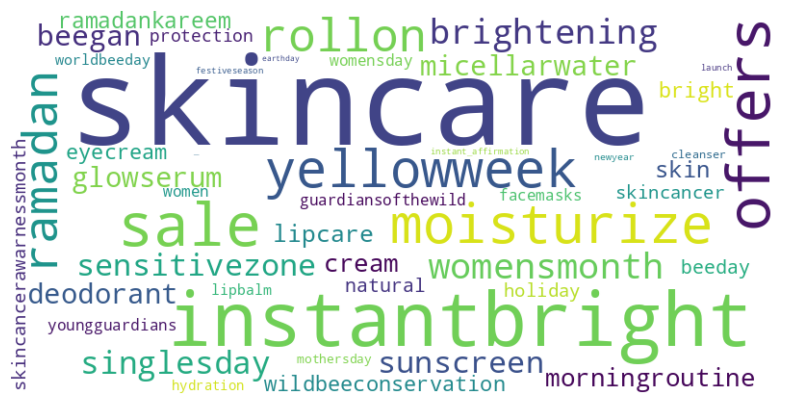

In [22]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you already have the 'filtered_df' dataset loaded.

# Extract all hashtags and engagements from the dataframe
hashtag_list = []
engagement_list = []

for idx, row in filtered_df.iterrows():
    hashtags = row['Hashtags'].split(', ')
    engagement = row['Engagement']
    for hashtag in hashtags:
        hashtag = hashtag.strip().lower()  # Convert to lowercase and strip spaces
        if hashtag == 'instant_bright':
            hashtag = 'instantbright'  # Consolidate
        hashtag_list.append(hashtag)
        engagement_list.append(engagement)

# Create a DataFrame from the lists
df_hashtags = pd.DataFrame({
    'Hashtag': hashtag_list,
    'Engagement': engagement_list
})

# Group by hashtag and sum the engagements
hashtag_engagement = df_hashtags.groupby('Hashtag')['Engagement'].sum().sort_values(ascending=False)

# Remove specified hashtags
hashtags_to_remove = ['natureinourcosmetics', 'naturalconfidence', 'passtheglow', 'beesline']
hashtag_engagement = hashtag_engagement[~hashtag_engagement.index.isin(hashtags_to_remove)]

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_engagement)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# Extract the top 5 hashtags and their engagement points
top_5_hashtags = hashtag_engagement.head(5)

print("Top 5 Hashtags and Their Engagement Points:")
print(top_5_hashtags)

Top 5 Hashtags and Their Engagement Points:
Hashtag
skincare         25073
instantbright     5996
offers            3602
sale              3602
moisturize        2907
Name: Engagement, dtype: int64


In [23]:
d# Print the list of hashtags used in the word cloud
hashtags_in_wordcloud = hashtag_engagement.index.tolist()

for hashtag in hashtags_in_wordcloud:
    print(hashtag)

skincare
instantbright
offers
sale
moisturize
yellowweek
ramadan
rollon
womensmonth
brightening
singlesday
sunscreen
sensitivezone
beegan
glowserum
micellarwater
deodorant
morningroutine
cream
lipcare
skin
ramadankareem
eyecream
bright
wildbeeconservation
natural
beeday
holiday
skincancerawarnessmonth
skincancer
protection
guardiansofthewild
youngguardians
womensday
women
facemasks
worldbeeday
lipbalm
hydration
mothersday
cleanser
newyear
_
instant_affirmation
festiveseason
launch
earthday


# Post Frequency & Engagement

In [24]:
import pandas as pd
import plotly.graph_objs as go

# Assuming 'filtered_df' is already loaded

# 1. Aggregate data by Month:
filtered_df['Month-Year'] = filtered_df['Post Date'].dt.to_period("M")
monthly_data = filtered_df.groupby('Month-Year').agg({'Engagement': 'sum', 'Post Date': 'count'}).rename(columns={'Post Date': 'Number of Posts'})

# 2. Plotting:
trace1 = go.Bar(
    x=monthly_data.index.astype(str),
    y=monthly_data['Number of Posts'],
    name='Number of Posts',
    yaxis='y1'
)

trace2 = go.Scatter(
    x=monthly_data.index.astype(str),
    y=monthly_data['Engagement'],
    name='Engagement',
    yaxis='y2'
)

layout = go.Layout(
    title='Frequency of Posts vs Engagement per Month',
    xaxis=dict(title='Month-Year'),
    yaxis=dict(title='Number of Posts'),
    yaxis2=dict(title='Engagement', overlaying='y', side='right'),
    hovermode='closest'
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

# 3. Correlation Test:
correlation = monthly_data['Number of Posts'].corr(monthly_data['Engagement'])
print(f"Pearson correlation coefficient between frequency of posts and engagement: {correlation:.2f}")

Pearson correlation coefficient between frequency of posts and engagement: 0.87
